# *Подготовка данных для первой половины задания*

In [ ]:
import pandas as pd

titan = pd.read_csv('/content/drive/MyDrive/titanic.csv') # pandas DataFrame
titanic = pd.concat([titan], keys=['PassengerId'])
titanic

PassengerId  Survived  Pclass  \
PassengerId 0              1         0       3   
            1              2         1       1   
            2              3         1       3   
            3              4         1       1   
            4              5         0       3   
...                      ...       ...     ...   
            886          887         0       2   
            887          888         1       1   
            888          889         0       3   
            889          890         1       1   
            890          891         0       3   

                                                              Name     Sex  \
PassengerId 0                              Braund, Mr. Owen Harris    male   
            1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
            2                               Heikkinen, Miss. Laina  female   
            3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
            4                             Allen, Mr. William Henry    male   
...                                                            ...     ...   
            886                              Montvila, Rev. Juozas    male   
            887                       Graham, Miss. Margaret Edith  female   
            888           Johnston, Miss. Catherine Helen "Carrie"  female   
            889                              Behr, Mr. Karl Howell    male   
            890                                Dooley, Mr. Patrick    male   

                  Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId 0    22.0      1      0         A/5 21171   7.2500   NaN        S  
            1    38.0      1      0          PC 17599  71.2833   C85        C  
            2    26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
            3    35.0      1      0            113803  53.1000  C123        S  
            4    35.0      0      0            373450   8.0500   NaN        S  
...               ...    ...    ...               ...      ...   ...      ...  
            886  27.0      0      0            211536  13.0000   NaN        S  
            887  19.0      0      0            112053  30.0000   B42        S  
            888   NaN      1      2        W./C. 6607  23.4500   NaN        S  
            889  26.0      0      0            111369  30.0000  C148        C  
            890  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#*Анализ таблицы*

 В каком классе было больше всего пассажиров?

In [ ]:
classes = titanic['Pclass'].value_counts()
classes

,count
Pclass,
3,491
1,216
2,184


Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?

In [ ]:
mean_sex = titanic.groupby('Sex').agg({'Age': 'mean'})
mean_sex

,Age
Sex,
female,27.915709
male,30.726645


In [ ]:
mean_class = titanic.groupby('Pclass').agg({'Age': 'mean'})
mean_class

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [ ]:
diff_age = titanic.groupby(['Pclass', 'Sex']).agg({'Age': ['min', 'max']})
diff_age

Age      
                min   max
Pclass Sex               
1      female  2.00  63.0
       male    0.92  80.0
2      female  2.00  57.0
       male    0.67  70.0
3      female  0.75  63.0
       male    0.42  74.0

In [ ]:
cl1_dif_in = titanic[(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female')]['Age'].min() - titanic[(titanic['Pclass'] == 1) & (titanic['Sex'] == 'male')]['Age'].min()
cl1_dif_ax = titanic[(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female')]['Age'].max() - titanic[(titanic['Pclass'] == 1) & (titanic['Sex'] == 'male')]['Age'].max()
cl2_dif_in = titanic[(titanic['Pclass'] == 2) & (titanic['Sex'] == 'female')]['Age'].min() - titanic[(titanic['Pclass'] == 2) & (titanic['Sex'] == 'male')]['Age'].min()
cl2_dif_ax = titanic[(titanic['Pclass'] == 2) & (titanic['Sex'] == 'female')]['Age'].max() - titanic[(titanic['Pclass'] == 2) & (titanic['Sex'] == 'male')]['Age'].max()
cl3_dif_in = titanic[(titanic['Pclass'] == 3) & (titanic['Sex'] == 'female')]['Age'].min() - titanic[(titanic['Pclass'] == 3) & (titanic['Sex'] == 'male')]['Age'].min()
cl3_dif_ax = titanic[(titanic['Pclass'] == 3) & (titanic['Sex'] == 'female')]['Age'].max() - titanic[(titanic['Pclass'] == 3) & (titanic['Sex'] == 'male')]['Age'].max()
print(f'Разница возрастов: {abs(cl1_dif_in)}, {abs(cl1_dif_ax)}, {abs(cl2_dif_in)}, {abs(cl2_dif_ax)}, {abs(cl3_dif_in)}, {abs(cl3_dif_ax)}')

Разница возрастов: 1.08, 17.0, 1.33, 13.0, 0.33, 11.0


Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?

In [ ]:
k_pass = titanic[titanic['Name'].str.startswith('K')]
survive_k = k_pass[k_pass['Survived'] == 1]
sorted_k = survive_k['Fare'].sort_values()
sorted_k[::-1]

PassengerId  621    52.5542
             457    51.8625
             316    26.0000
             184    22.0250
             706    13.5000
             691    13.4167
             303    12.3500
             573     7.7500
             300     7.7500
Name: Fare, dtype: float64

In [ ]:
min_price = sorted_k.iloc[0]
max_price = sorted_k.iloc[-1]
survive_k[survive_k['Fare'] == min_price]

PassengerId  Survived  Pclass  \
PassengerId 300          301         1       3   
            573          574         1       3   

                                                     Name     Sex  Age  SibSp  \
PassengerId 300  Kelly, Miss. Anna Katherine "Annie Kate"  female  NaN      0   
            573                         Kelly, Miss. Mary  female  NaN      0   

                 Parch Ticket  Fare Cabin Embarked  
PassengerId 300      0   9234  7.75   NaN        Q  
            573      0  14312  7.75   NaN        Q

In [ ]:
survive_k[survive_k['Fare'] == max_price]

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


Какое максимальное количество родных было с выжившим пассажиром?


In [ ]:
survived = titanic[titanic['Survived'] == 1]
survived.loc[:,'tot_rel'] = (survived['Parch'] + survived['SibSp'])
print(survived['tot_rel'].max())

6


/tmp/ipython-input-1360994490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived.loc[:,'tot_rel'] = (survived['Parch'] + survived['SibSp'])


#*Визуализация*


    Необходимо построить по данным таблицы 10 различных графиков нa
    своё усмотрение и фантазию. Использовать можно любые средства
    однако рекомендуется Seaborn и Plotly.
    5 графиков должно быть интерактивными
    1 график необходимо сделать 3D

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

mean_sex = titanic.groupby('Sex').agg({'Age': 'mean'})
fig1 = px.bar(mean_sex.reset_index(), x='Sex', y='Age',title='Mean Age')
fig1.show()

In [ ]:
# linear plot of price for tickets for people with k-names
k_pass = titanic[titanic['Name'].str.startswith('K')]
survive_k = k_pass[k_pass['Survived'] == 1]
survive_pas = titanic[titanic['Survived'] == 1]

sorted_k = survive_k[['Name','Fare']].sort_values('Fare')
sorted_pas = survive_pas[['Name','Fare']].sort_values('Fare')

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=sorted_k['Name'], y=sorted_k['Fare'], mode = 'lines+markers', name='K-passengers', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=sorted_pas['Name'], y=sorted_pas['Fare'], mode = 'lines+markers', name='All', line=dict(color='blue')))

fig2.show()

In [ ]:
from pandas.core.algorithms import value_counts
# pie chart for classes
classes = titanic['Pclass'].value_counts()
fig3 = px.pie(values =classes.values, names = classes.index, title='Quantity of people in Classes')
fig3.show()

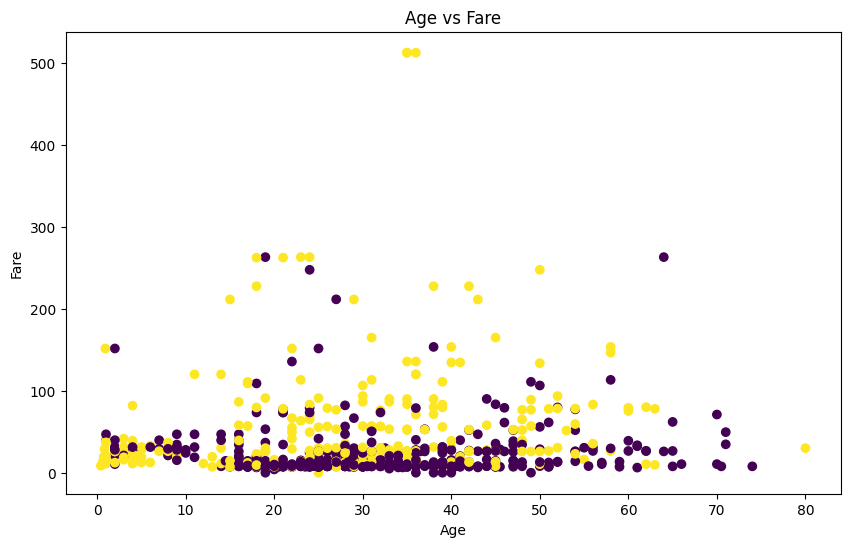

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(titanic['Age'], titanic['Fare'], c=titanic['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

In [ ]:
BG = titanic['Sex'].value_counts() # Horisontal
fig5 = px.bar(BG, x = 'count', title='Mean age of people')
fig5.show()

In [ ]:
Siblings = titanic['SibSp'] # Histogram
fig6 = px.histogram(Siblings, x = 'SibSp',  title='Siblings')
fig6.show()

In [ ]:
Parents = titanic[['Pclass', 'Sex']]
fig7 = px.box(Parents, x = 'Sex', y = 'Pclass', title='Sex of people in deff. classes')
fig7.show()

In [ ]:
fig8 = px.sunburst(titanic,path=['Pclass', 'Sex', 'Survived'], title='Passengers by Class, Sex and Survival')
fig8.show()

In [ ]:
sample_data = titanic.head(50).sort_values('Age')

fig9 = px.line_3d(sample_data,
                 x='Age',
                 y='Fare',
                 z='Pclass',
                 color='Sex',
                 title='3D Line: Age vs Fare vs Class')
fig9.show()

In [ ]:
survive_pas = titanic[titanic['Survived'] == 1]
fem_val = survive_pas[survive_pas['Sex'] == 'female']
mal_val = survive_pas[survive_pas['Sex'] == 'male']

fig10 = go.Figure()
fig10.add_trace(go.Scatter(x=fem_val['Name'], y=fem_val['Fare'], mode = 'lines+markers', name='Woman', line=dict(color='red')))
fig10.add_trace(go.Scatter(x=mal_val['Name'], y=mal_val['Fare'], mode = 'lines+markers', name='Man', line=dict(color='blue')))

fig10.show()

Сделать Sankey Diagram в Plotly на данных датасета

In [ ]:
class_survival = titanic.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

fig = go.Figure(data=[go.Sankey(node=dict(label=['Class 1', 'Class 2', 'Class 3', 'Died', 'Survived']),
                                link=dict(source=[0, 0, 1, 1, 2, 2],target=[3, 4, 3, 4, 3, 4],value=class_survival['count'].tolist()))])

fig.update_layout(title_text="Class - Survival", font_size=10)
fig.show()